<a href="https://colab.research.google.com/github/feuziq47/pythonML/blob/master/ml5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
cd gdrive/My Drive/ColabML

/content/gdrive/My Drive/ColabML


In [0]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

In [0]:
lr=LogisticRegression()
kn=KNeighborsClassifier()

vot=VotingClassifier(estimators=[('LR',lr),('KNN',kn)],voting='soft')
x_train,x_test,y_train,y_test=train_test_split(cancer.data,cancer.target,test_size=0.2,random_state=0)

vot.fit(x_train,y_train)

pred=vot.predict(x_test)
print('Voting Classifier Accuracy:{0:.4f}'.format(accuracy_score(y_test,pred)))

Voting Classifier Accuracy:0.9561


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
# 신용카드 사기 검출 모델 학습
import pandas as pd
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE


#데이터 로드
card=pd.read_csv('train.csv')
card_data1=card.drop(['Class'],axis=1)
card_target=card['Class']
card_df=pd.DataFrame(card_data,card_target)
#oversampling
sm = SMOTE(ratio=0.4,kind='regular',n_jobs=-1)
card_data,card_target=sm.fit_sample(card_data1,card_target)

#test/train set 분리
x_train,x_test,y_train,y_test=train_test_split(card_data,card_target,test_size=0.2,random_state=7,stratify=card_target)




ValueError: ignored

In [0]:
#confusion matrix,precision,recall,accuracy 확인 함수
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix
def get_clf_eval(y_test,pred):
    confusion=confusion_matrix(y_test,pred)
    accuracy=accuracy_score(y_test,pred)
    precision=precision_score(y_test,pred)
    recall=recall_score(y_test,pred)
    
    print('Confusion Matrixs')
    print(confusion)
    print('Accuracy:{0:.4f},Precision{1:.4f},Recall:{2:.4f}'.format(accuracy,precision,recall))

In [0]:
#gridSearch 객체 생성 및 튜닝
params={'n_estimators':[50]
        ,'learning_rate':[0.1]
        ,'max_depth':[5,8,16]
       }
start_time=time.time()
grid=GridSearchCV(gd,param_grid=params,cv=2,refit=1,scoring='recall')
grid.fit(x_train,y_train)

print('Optimal Hyper Parameter:\n',grid.best_params_)
print('Max Recall:{0:.4f}'.format(grid.best_score_))
print('GB training time:{0:.4f}sec'.format(time.time()-start_time))




KeyboardInterrupt: ignored

In [0]:
#GradientBoostingClassifier 최적값으로 recall 확인
gd=GradientBoostingClassifier(random_state=7,learning_rate=0.1,n_estimators=100)
gd.fit(x_train,y_train)
#pred=grid.best_estimator_.predict(x_test)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=7, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [0]:
df_test = pd.read_csv('test.csv')


df_y_test = df_test['Class']
df_x_test = df_test.drop(['Time','Class'], axis = 1)

pred = gd.predict(df_x_test)
get_clf_eval(df_y_test, pred)

roc_score=roc_auc_score(df_y_test,pred)
print('ROC AUC 값:{0:.4f}'.format(roc_score))

ValueError: ignored

In [0]:
#최적의 파라미터로 성능지표 출력
get_clf_eval(y_test,pred)

Confusion Matrixs
[[39797     7]
 [   19    50]]
Accuracy:0.9993,Precision0.8772,Recall:0.7246


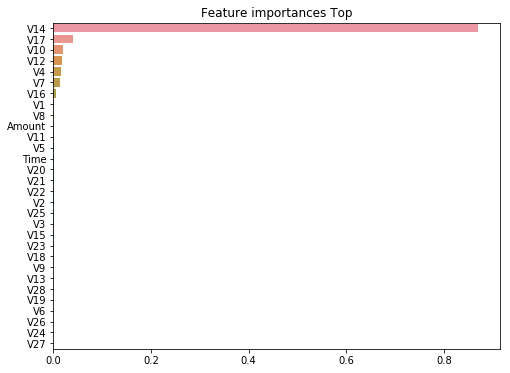

In [0]:
#featue importance 확인
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

gd_importances_values = gd.feature_importances_
gd_importances = pd.Series(gd_importances_values,index=card_data1.columns)
gd_top = gd_importances.sort_values(ascending=False)

plt.figure(figsize=(8,6))
plt.title('Feature importances Top')
sns.barplot(x=gd_top , y = gd_top.index)
plt.show()

[[ 1.38482000e+05 -8.36762104e+00  7.40296888e+00 ...  1.51373648e+00
   6.69503957e-01  6.90000000e-01]
 [ 1.46847000e+05 -1.29066221e+00  7.64452146e-01 ...  5.14047967e-02
   1.03879444e-01  5.54700000e+01]
 [ 7.19090000e+04 -6.06860210e-01  2.33923221e-01 ... -4.68399360e-02
  -8.72585848e-02  1.15000000e+01]
 ...
 [ 5.91018164e+04 -1.03323876e-01  1.80495004e+00 ...  5.11286701e-01
   1.35488259e-01  6.57221110e+01]
 [ 1.79177734e+04 -8.71229210e+00  8.52525126e+00 ...  1.81528524e+00
   7.47385536e-02  1.00000000e+00]
 [ 5.89260844e+04 -3.19493521e+00 -1.29305237e+00 ...  5.95195866e-01
  -4.02977148e-01  7.76198983e+01]]


In [0]:
from sklearn.metrics import roc_curve

pred_proba_class1=lr_clf.predict_proba(x_test)[:,1]
fprs,tprs,thresholds=roc_curve(y_test,pred_proba_class1)
print('Shape Of Thresholds List:',thresholds.shape)

thr_index=np.arange(0,thresholds.shape[0],15)
print('Sample Threshold Index:',thr_index)
print('Sample Threshold Value:',np.round(thresholds[thr_index],2))

print('Sample Threshold FPR:',np.round(fprs[thr_index],3))
print('Sample Threshold TPR:',np.round(tprs[thr_index],3))

NameError: ignored

In [0]:
#roc_curve 그래프 그리는 함수
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def ROC_curve_plot(y_test, pred_proba_c1):
    fprs,tprs,thresholds=roc_curve(y_test,pred_proba_c1)
    plt.plot(fprs,tprs,label='ROC')
    plt.plot([0,1],[0,1],'k--',label='Random')
    #x축의 lim 값으로 x축의 좌표를 만듦
    start,end=plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR(1-Sensitivity)')
    plt.ylabel('TPR(Recall)')
    plt.legend()
    plt.grid()
    plt.show()

In [0]:

df_test = pd.read_csv('test.csv')


df_y_test = df_test['Class']
df_x_test = df_test.drop(['Class'], axis = 1)

pred = gd.predict(df_x_test)
get_clf_eval(df_y_test, pred)

roc_score=roc_auc_score(df_y_test,pred)
print('ROC AUC 값:{0:.4f}'.format(roc_score))

Confusion Matrixs
[[85195   100]
 [   25   123]]
Accuracy:0.9985,Precision0.5516,Recall:0.8311
ROC AUC 값:0.9150


In [0]:
!python -m pip install lightgbm

In [0]:
#lightGBM
from lightgbm import LGBMClassifier
lgbm=LGBMClassifier(random_state=8)

params={'n_estimators':[50]
        ,'learning_rate':[0.1]
        ,'max_depth':[2,4,8,16]
       }
start_time=time.time()
grid=GridSearchCV(lgbm,param_grid=params,cv=2,refit=1,scoring='recall')
grid.fit(x_train,y_train)

print('Optimal Hyper Parameter:\n',grid.best_params_)
print('Max Recall:{0:.4f}'.format(grid.best_score_))
print('GB training time:{0:.4f}sec'.format(time.time()-start_time))


Optimal Hyper Parameter:
 {'learning_rate': 0.1, 'max_depth': 16, 'n_estimators': 50}
Max Recall:0.9893
GB training time:14.4365sec


In [0]:
lgbm=LGBMClassifier(random_state=8,learning_rate=0.1,max_depth=16,n_estimators=50)
lgbm.fit(x_train,y_train)
df_test = pd.read_csv('test.csv')


df_y_test = df_test['Class']
df_x_test = df_test.drop(['Class'], axis = 1)

pred = lgbm.predict(df_x_test)
get_clf_eval(df_y_test, pred)

roc_score=roc_auc_score(df_y_test,pred)
print('ROC AUC 값:{0:.4f}'.format(roc_score))

Confusion Matrixs
[[85237    58]
 [   27   121]]
Accuracy:0.9990,Precision0.6760,Recall:0.8176
ROC AUC 값:0.9084
